In [107]:
import Quaternion_helper
import importlib
importlib.reload(Quaternion_helper)
from Quaternion_helper import Quaternion


import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np


%matplotlib widget


#helper functions
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

def create3dPlot(title):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    return fig, ax

def showPoint(ax, point, description, color):
    ax.scatter([point.x], [point.y], [point.z], color=color)
    ax.text(point.x, point.y, point.z, f"{description}: {point}", color=color)



# What is a Quaternion

A quaternion is compose of one real number and 3 imaginary numbers

We can onften see it in this form :

``` a + bi + cj + dk ``` 

Where 
 - i j and k are the imaginary numers and 
 - a b c d are the coefficients (a is the real number).


We can define a quaternion with the library with ``` Quaternion(a, b, c, d) ``` 

For example :



In [74]:
importlib.reload(Quaternion_helper)
from Quaternion_helper import Quaternion


myQuaternion = Quaternion(3, 5, 20, 3)
print(myQuaternion)


(3 + 5i + 20j + 3k)


# Add and Substract Two Quaternion

It is possible to add and substract two quaternions.

Let 2 quaternions w and x

 - ``` w = a + bi + cj + dk ```
 - ``` x = e + fi + gj + hk ```

Then, 

- ``` w + x = (a + bi + cj + dk) + (e + fi + gj + hk) ```
- ``` w + x = = (a+e) + (b+f)i + (c+g)j + (d+h)k ```


The same thing applies to the substraction

For example:


In [75]:
importlib.reload(Quaternion_helper)
from Quaternion_helper import Quaternion

w = Quaternion(10, 20, 30, 40)
x = Quaternion(6, 7, 8, 9)
y = w + x
z = w - x

print(y)
print(z)

(16 + 27i + 38j + 49k)
(4 + 13i + 22j + 31k)


# Representation of a 3D Point With Quaternions

A 3d point can be represented with the imaginary part of a quaternion. The real part is 0

For example, the point (5, 3, 10) in the 3d space could be represented by 0 + 5i + 3j + 10k

Fuerthermore, the same operators can be applied to this 3d point

Code example:

Point 1: (10, 10, 10)
Point 2: (25, 30, 20)
Point 1 + Point 2 : (35, 40, 30)
Point 1 - Point 2 : (35, 40, 30)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
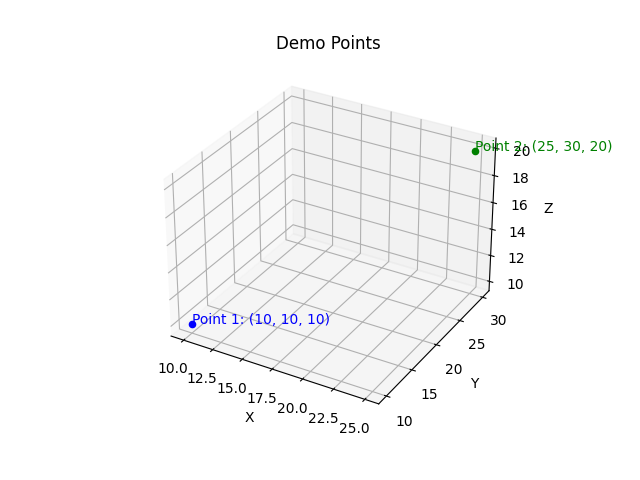

In [108]:
importlib.reload(Quaternion_helper)
from Quaternion_helper import Point3D

myPoint1 = Point3D(10, 10, 10)
myPoint2 = Point3D(25, 30, 20)
myPoint3 = myPoint1 + myPoint2
myPoint4 = myPoint1 - myPoint2


print(f"Point 1: {myPoint1}")
print(f"Point 2: {myPoint2}")
print(f"Point 1 + Point 2 : {myPoint3}")
print(f"Point 1 - Point 2 : {myPoint4}")


# show points 1 and 2 in 3d
fig, ax = create3dPlot("Demo Points")
showPoint(ax, myPoint1, "Point 1", "blue")
showPoint(ax, myPoint2, "Point 2", "green")

plt.show()


# Conjugate of a Quaternion

Let's say we have a quaternion q = a + bi + cj + dk

Then conj(q) = a - bi - cj - dk 



In [109]:
importlib.reload(Quaternion_helper)
from Quaternion_helper import Quaternion

q = Quaternion(5, 6, 10, 20)
print(q)
print(q.conj())

(5 + 6i + 10j + 20k)
(5 + -6i + -10j + -20k)


# Multiplication of Tow Quaternions

Like imaginary numbers where i^2 = -1, quaternions have their own algebraic rules. The formula for quaternions is 

i^2 = j^2 = k^2 = ijk = -1

Following this rules, when we try to multiply two quaternions x*y where

 - x =  a1 + b1i + c1j + d1k
 - a2 + b2i + c2j + d2k

We can deduce that x*y = (a1a2 - b1b2 - c1c2 - d1d2) + (a1b2 + b1a2 + c1d2 - d1c2)i + (a1c2 - b1d2 + c1a2 + d1b2)j + (a1d2 + b1c2 - c1b2 + d1a2)k

This rule is called the Hamilton product and can be derived with the distributive law and the formula for quaternion

In [115]:
importlib.reload(Quaternion_helper)
from Quaternion_helper import Quaternion, Point3D

x = Quaternion(5,6,10,3)

# y and z are equivalent
y = Point3D(3,6,7)
z = Quaternion(0, 3,6,7)

print(x)
print(y)
print(x*y)
print(x*z)

(5 + 6i + 10j + 3k)
(3, 6, 7)
(-99 + 67i + -3j + 41k)
(-99 + 67i + -3j + 41k)


# Rotation of a Point With a Quaternion

Let's say that we have a quaternion that describes the orientation of an object (in our case the quaternion the sbg gives us in the rocket).

Then, it is easy to apply this rotation to a point with quaternions. 

Let's say we have a point P = 0 + 5i + 10j + 30k . In other words, P is at the location (5, 10, 30). 
We also have a quaternion q = 6 + 2i + 3j + 6k 

Then, the new point o following the rotation will be

o = q * Pin * conj(q)

In [94]:
plt.close('all')